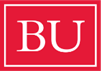 
<div style="text-align: center"> <h1>Assignment - 1</div>


<div style="text-align: center"> <h3>AD699 A3 Data Mining (Spring 2024)</div>


<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>


#### Solution - 1

In [1]:
library(tidyverse)
library(dplyr)
library(lubridate)
install.packages("naniar")
library(naniar)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

also installing the dependencies 'viridisLite', 'gridExtra', 'cli', 'norm', 'visdat', 'rlang', 'viridis', 'UpSetR', 'vctrs', 'lifecycle'

Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  cannot open URL 'https

  These will not be installed


installing the source packages 'viridisLite', 'gridExtra', 'visdat', 'viridis', 'UpSetR', 'lifecycle', 'naniar'

Warning message in install.packages("naniar"):
"installation of package 'lifecycle' had non-zero exit status"Warning message in install.packages("naniar"):
"installation of package 'naniar' had non-zero exit status"

ERROR: Error in library(naniar): there is no package called 'naniar'


#### Solution - 2 a]

In [9]:
df <- read.csv("chicago_violations.csv")

In [10]:
str(df)

'data.frame':	784225 obs. of  22 variables:
 $ ID                   : Factor w/ 784225 levels "00000da0351f130050dcff1d86eb41d73066e930",..: 486179 560000 680109 782916 780628 604896 217983 442604 595273 293554 ...
 $ DOCKET.NUMBER        : Factor w/ 122012 levels "","08BN00001A",..: 118771 76470 117663 114704 118585 118771 117101 56196 118780 118140 ...
 $ NOV.NUMBER           : Factor w/ 122054 levels ".14CO421880",..: 116777 79974 117840 114588 117379 116777 117006 51994 117980 116738 ...
 $ ADDRESS              : Factor w/ 80639 levels "0  UNKNOWN ST",..: 48848 32030 37675 41871 11803 48848 64819 65932 74492 44455 ...
 $ STREET.NUMBER        : int  5006 3241 3811 4259 1614 5006 6729 6926 8155 4520 ...
 $ STREET.DIRECTION     : Factor w/ 5 levels "","E","N","S",..: 5 5 5 5 5 5 4 3 4 4 ...
 $ STREET.NAME          : Factor w/ 1408 levels "`81ST","0GDEN",..: 623 117 116 1374 125 623 533 1354 762 470 ...
 $ STREET.TYPE          : Factor w/ 30 levels "","AVE","BLVD",..: 25 25 25 25 25 25

#### Solution - 2 b]

> **💡Interpretation of Code💡-**
>
> Calling the 'str()' function would display the structure of the dataset, including information about the variables (columns) and observations (rows). 
>
> It provides a concise summary of the structure of the  object. 
>
> It displays  the data type and first few values of each variable.
>
> From the provided output of 'str(cv)' we can see that dataframe contains 784225 observations and 22 varaibles.

#### Solution - 3

In [11]:
## Filter the data with Ward 13 records
assigned_ward <- 13
df2 <- df[df$WARD == assigned_ward,]
str(df2)

'data.frame':	8234 obs. of  22 variables:
 $ ID                   : Factor w/ 784225 levels "00000da0351f130050dcff1d86eb41d73066e930",..: NA NA NA NA NA NA NA 595590 2712 NA ...
 $ DOCKET.NUMBER        : Factor w/ 122012 levels "","08BN00001A",..: NA NA NA NA NA NA NA 86124 86124 NA ...
 $ NOV.NUMBER           : Factor w/ 122054 levels ".14CO421880",..: NA NA NA NA NA NA NA 83174 83174 NA ...
 $ ADDRESS              : Factor w/ 80639 levels "0  UNKNOWN ST",..: NA NA NA NA NA NA NA 42165 42165 NA ...
 $ STREET.NUMBER        : int  NA NA NA NA NA NA NA 4311 4311 NA ...
 $ STREET.DIRECTION     : Factor w/ 5 levels "","E","N","S",..: NA NA NA NA NA NA NA 5 5 NA ...
 $ STREET.NAME          : Factor w/ 1408 levels "`81ST","0GDEN",..: NA NA NA NA NA NA NA 929 929 NA ...
 $ STREET.TYPE          : Factor w/ 30 levels "","AVE","BLVD",..: NA NA NA NA NA NA NA 22 22 NA ...
 $ WARD                 : int  NA NA NA NA NA NA NA 13 13 NA ...
 $ ISSUING.DEPARTMENT   : Factor w/ 1 level "Buildings": NA 

> **💡Interpretation of Results💡-**
>
> After filtering the dataframe for Ward = 13, resulting dataset contains 8234 observations and 22 variables.
> The three interesting facts about Ward 13 in Chicago are -
>
> Ward 13, also known as the 'Near West Side', is home to the historic University of Illinois at Chicago (UIC) campus, which plays a significant role in shaping the cultural and educational landscape  of the area.
>
> Ward 13 is known for its diverse population and vibrant neighborhoods, including the bustling Greek Town, Little Italy, and the developing West Loop area, which has seen rapid growth in recent years with the emergence of trendy restaurants, art galleries, and tech startups.
>
> Ward 13 is also home to important cultural landmarks such as the United Center, where the Chicago Bulls and Chicago Blasckhawks play, and the historic Maxwell Street Market, known for its rich history as a vibrant marketplace for food, music, and commerce.


#### Solution - 4 a]

In [13]:
## Dealing with NA data
sum(is.na(df2))

[1] 61822

> **💡Interpretation of Results💡-**
>
> Yes, there are NA values in my data df2. I checked this by "View(df2)" function in the RStudio. From the output that was delivered we can see that, there are 61822 NAs in the dataframe.

#### Solution - 4 b]

In [14]:
complete_case <- sum(complete.cases(df2))
total_rows <- nrow(df2)
percentage_complete <- (complete_case / total_rows) * 100
percentage_complete

[1] 65.86106

> **💡Interpretation of Results💡-**
>
> 65.86106% of data is complete case. A complete case in a data frame refers to a row that contains no missing values across all its variables. In other words, a complete case is a row where every variable has a non-missing (non-NA) value.

#### Solution - 4 c]

In [16]:
#Converting any blank cells in the data frame into NA
df2[df2 == ""] <- NA

#### Solution - 4 d]

In [17]:
sum(is.na(df2))

[1] 61946

> **💡Interpretation of Results💡-**
>
> The total number of NA values in my dataset are 61946 

#### Solution - 4 e]

In [18]:
complete_case2 <- sum(complete.cases(df2))
total_rows2 <- nrow(df2)
percentage_complete2 <- (complete_case2 / total_rows2) * 100
percentage_complete2

[1] 64.36726

> **💡Interpretation of Results💡-**
>
> 64.37% percentage of rows in the dataframe are complete cases

#### Solution - 4 f]

In [27]:
# Generate a table that shows the number of missing values and the percentage of missing values for each variable. 
missing_summary <- miss_var_summary(df2)
print(missing_summary)

# A tibble: 22 x 3
   variable         n_miss pct_miss
   <chr>             <int>    <dbl>
 1 CASE.DISPOSITION   2911     35.4
 2 STREET.TYPE        2830     34.4
 3 VIOLATION.DATE     2812     34.2
 4 LATITUDE           2811     34.1
 5 LONGITUDE          2811     34.1
 6 LOCATION           2811     34.1
 7 ID                 2810     34.1
 8 DOCKET.NUMBER      2810     34.1
 9 NOV.NUMBER         2810     34.1
10 ADDRESS            2810     34.1
# ... with 12 more rows


#### Solution - 5 a]

In [33]:
### We have HEARING.DATE, LAST.MODIFIED.DATE & VIOLATION.DATE as date variables. They are currently seen in chr - text format.
str(df2)

'data.frame':	8234 obs. of  22 variables:
 $ ID                   : Factor w/ 784225 levels "00000da0351f130050dcff1d86eb41d73066e930",..: NA NA NA NA NA NA NA 595590 2712 NA ...
 $ DOCKET.NUMBER        : Factor w/ 122012 levels "","08BN00001A",..: NA NA NA NA NA NA NA 86124 86124 NA ...
 $ NOV.NUMBER           : Factor w/ 122054 levels ".14CO421880",..: NA NA NA NA NA NA NA 83174 83174 NA ...
 $ ADDRESS              : Factor w/ 80639 levels "0  UNKNOWN ST",..: NA NA NA NA NA NA NA 42165 42165 NA ...
 $ STREET.NUMBER        : int  NA NA NA NA NA NA NA 4311 4311 NA ...
 $ STREET.DIRECTION     : Factor w/ 5 levels "","E","N","S",..: NA NA NA NA NA NA NA 5 5 NA ...
 $ STREET.NAME          : Factor w/ 1408 levels "`81ST","0GDEN",..: NA NA NA NA NA NA NA 929 929 NA ...
 $ STREET.TYPE          : Factor w/ 30 levels "","AVE","BLVD",..: NA NA NA NA NA NA NA 22 22 NA ...
 $ WARD                 : int  NA NA NA NA NA NA NA 13 13 NA ...
 $ ISSUING.DEPARTMENT   : Factor w/ 1 level "Buildings": NA 

#### Solution - 5 b]

In [44]:
df2$HEARING.DATE <- as.Date(df2$HEARING.DATE, format = "%Y/%m/%d")
str(df2)
df2$LAST.MODIFIED.DATE <- as.Date(df2$LAST.MODIFIED.DATE, format = "%Y/%m/%d")
df2$VIOLATION.DATE <- as.Date(df2$VIOLATION.DATE, format = "%Y/%m/%d")

# Sucessfully converted all the date data format

'data.frame':	8234 obs. of  22 variables:
 $ ID                   : Factor w/ 784225 levels "00000da0351f130050dcff1d86eb41d73066e930",..: NA NA NA NA NA NA NA 595590 2712 NA ...
 $ DOCKET.NUMBER        : Factor w/ 122012 levels "","08BN00001A",..: NA NA NA NA NA NA NA 86124 86124 NA ...
 $ NOV.NUMBER           : Factor w/ 122054 levels ".14CO421880",..: NA NA NA NA NA NA NA 83174 83174 NA ...
 $ ADDRESS              : Factor w/ 80639 levels "0  UNKNOWN ST",..: NA NA NA NA NA NA NA 42165 42165 NA ...
 $ STREET.NUMBER        : int  NA NA NA NA NA NA NA 4311 4311 NA ...
 $ STREET.DIRECTION     : Factor w/ 5 levels "","E","N","S",..: NA NA NA NA NA NA NA 5 5 NA ...
 $ STREET.NAME          : Factor w/ 1408 levels "`81ST","0GDEN",..: NA NA NA NA NA NA NA 929 929 NA ...
 $ STREET.TYPE          : Factor w/ 30 levels "","AVE","BLVD",..: NA NA NA NA NA NA NA 22 22 NA ...
 $ WARD                 : int  NA NA NA NA NA NA NA 13 13 NA ...
 $ ISSUING.DEPARTMENT   : Factor w/ 1 level "Buildings": NA 

#### Solution - 5 c]

In [46]:
# Added CityDelay as a variable
df3 <- mutate(df2, CityDelay = HEARING.DATE - VIOLATION.DATE)

#### Solution - 5 d]

In [48]:
birthday_violations <- filter(df3, format(HEARING.DATE, "%m-%d") == "02-25")
violation_count <- nrow(birthday_violations)
most_common_disposition <- birthday_violations %>%
  count(CASE.DISPOSITION) %>%
  arrange(desc(n)) %>%
  slice(1) %>%
  pull(CASE.DISPOSITION)
violation_count
most_common_disposition

[1] 32

[1] Non-Suit
9 Levels:  Adjudication Performance / Other Continuance ... Not Liable

> **💡Interpretation of Results💡-**
>
> Ordinance violations were issued on my birthday 32; Most common Case Disposition for those ordinance violations = "Non-Suit"

#### Solution - 6 a]

Ward represent different sections of Chicago, which suggests that it is categorical rather than numeric. Each ward is a distinct category or group, and there is no inherent order or numerical relationship between the wards.

#### Solution - 6 b]

In [49]:
df4 <- na.omit(df3[, c("IMPOSED.FINE", "ADMIN.COSTS")])

correlation <- cor(df4$IMPOSED.FINE, df4$ADMIN.COSTS)
print(correlation)

[1] 0.1589375


> **💡Interpretation of Results💡-**
> 
> Correlation of 0.1589375 suggests a weak positive correlation between "imposed fine" & "admin costs". This means that there is some tendency for them to increase together, but the relationship is not strong. Other factos may have a more significant influence on admin costs than imposed fines alone.

#### Solution - 6 c]

In [50]:
street_type <- df3 %>%
count(STREET.TYPE)
street_type

most_common_street_type <- street_type %>%
  arrange(desc(n)) %>%
  slice(1) %>%
  pull(STREET.TYPE)
print(paste("The most common street type in Ward 13 is:", most_common_street_type))

Warning message:
"Factor `STREET.TYPE` contains implicit NA, consider using `forcats::fct_explicit_na`"

STREET.TYPE,n
AVE,3250
PL,753
RD,189
ST,1212
NA,2830


[1] "The most common street type in Ward 13 is: AVE"


 > **💡Interpretation of Results💡-**
>
> The most common street type is Ave. Yes, it is the same street type as the one that I live on.

#### Solution - 6 d]

In [51]:
vc <- length(unique(df3$VIOLATION.CODE))
vd <- length(unique(df3$VIOLATION.DESCRIPTION))
print(paste("Number of unique Violation Code values are:", vc))
print(paste("Number of unique violation description are:", vd))

[1] "Number of unique Violation Code values are: 341"
[1] "Number of unique violation description are: 339"


#### Solution - 7 a]

In [52]:
df3$Year <- lubridate::year(df3$HEARING.DATE)
average_imposed_fine <- df3 %>%
  filter(IMPOSED.FINE > 0) %>% #Filter out cases where the fine is greater than zero
  group_by(Year) %>%
  summarise(average_imposed_fine = mean(IMPOSED.FINE, na.rm = TRUE))
average_imposed_fine

Year,average_imposed_fine
2008,2219.2529
2009,1312.6402
2010,746.6667
2011,3939.6176
2012,1239.3720
2013,1298.2843
2014,507.8431
2015,1989.6907
2016,872.6415
2017,488.7850


 > **💡Interpretation of Results💡-**
>
> One reason for numbers of 2024 is lower than other is because we only have 2 month data available with us.

#### Solution - 8

In [53]:
# Remove ID and Docket Number

df5 <- df3[,-c(1,2)]

#### Solution - 9

In [54]:
# Create a new column called season based on the quarter of Violation Date
df5$season <- quarter(df5$VIOLATION.DATE)
df5$season <- factor(df5$season, levels = 1:4, labels = c("Winter", "Spring", "Summer", "Fall"))
head(df5)


NOV.NUMBER,ADDRESS,STREET.NUMBER,STREET.DIRECTION,STREET.NAME,STREET.TYPE,WARD,ISSUING.DEPARTMENT,HEARING.DATE,CASE.DISPOSITION,...,VIOLATION.DATE,VIOLATION.CODE,VIOLATION.DESCRIPTION,RESPONDENTS,LATITUDE,LONGITUDE,LOCATION,CityDelay,Year,season
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA days,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA days,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA days,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA days,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA days,NA,NA
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA days,NA,NA


#### Solution - 10

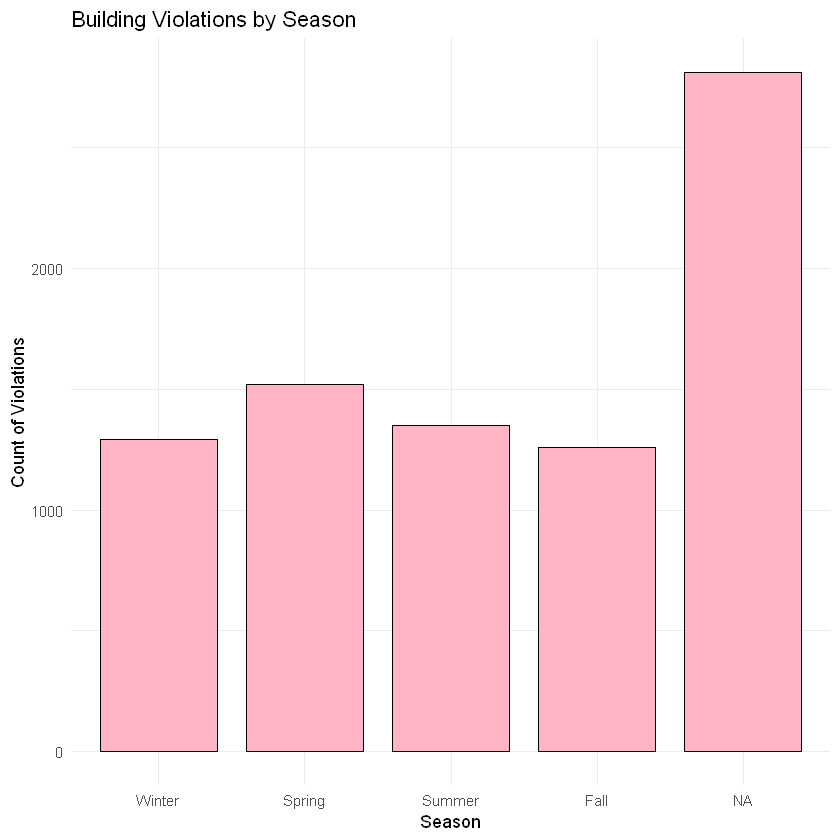

In [55]:
library(ggplot2)

ggplot(df5, aes(x = season)) +
  geom_bar(fill = "pink1", color = "black", width = 0.8) +
  labs(x = "Season", y = "Count of Violations", title = "Building Violations by Season") +
  theme_minimal()

> **💡Interpretation of Results💡-**
>
>  Spring has the highest count of Violations that maybe due to increase in constructional activities during that season.

#### Solution - 11 a]

In [57]:
## Step: 1 - Calculate the frequency of each Case Disposition
case_disposition_freq <- df5 %>%
  count(CASE.DISPOSITION)
## Step: 2 - Select the top 5 most common Case Dispositions 
top_5_disposition <- case_disposition_freq %>%
  arrange(desc(n)) %>%
  slice(1:5) %>%
  pull(CASE.DISPOSITION)

## Step: 3 Filter the dataset to keep only rows with the top 5 Case Disposition
df5_filtered <- df5 %>%
  filter(CASE.DISPOSITION %in% top_5_disposition)

## Step: 4 
str(df5_filtered)
### a] The dataframe has 8041 rows.

Warning message:
"Factor `CASE.DISPOSITION` contains implicit NA, consider using `forcats::fct_explicit_na`"

'data.frame':	8041 obs. of  23 variables:
 $ NOV.NUMBER           : Factor w/ 122054 levels ".14CO421880",..: NA NA NA NA NA NA NA 83174 83174 NA ...
 $ ADDRESS              : Factor w/ 80639 levels "0  UNKNOWN ST",..: NA NA NA NA NA NA NA 42165 42165 NA ...
 $ STREET.NUMBER        : int  NA NA NA NA NA NA NA 4311 4311 NA ...
 $ STREET.DIRECTION     : Factor w/ 5 levels "","E","N","S",..: NA NA NA NA NA NA NA 5 5 NA ...
 $ STREET.NAME          : Factor w/ 1408 levels "`81ST","0GDEN",..: NA NA NA NA NA NA NA 929 929 NA ...
 $ STREET.TYPE          : Factor w/ 30 levels "","AVE","BLVD",..: NA NA NA NA NA NA NA 22 22 NA ...
 $ WARD                 : int  NA NA NA NA NA NA NA 13 13 NA ...
 $ ISSUING.DEPARTMENT   : Factor w/ 1 level "Buildings": NA NA NA NA NA NA NA 1 1 NA ...
 $ HEARING.DATE         : Date, format: NA NA ...
 $ CASE.DISPOSITION     : Factor w/ 9 levels "","Adjudication Performance / Other",..: NA NA NA NA NA NA NA 4 4 NA ...
 $ IMPOSED.FINE         : num  NA NA NA NA NA NA 

#### Solution - 11 b]

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.
Warning message:
"Removed 2812 rows containing non-finite values (stat_bin)."

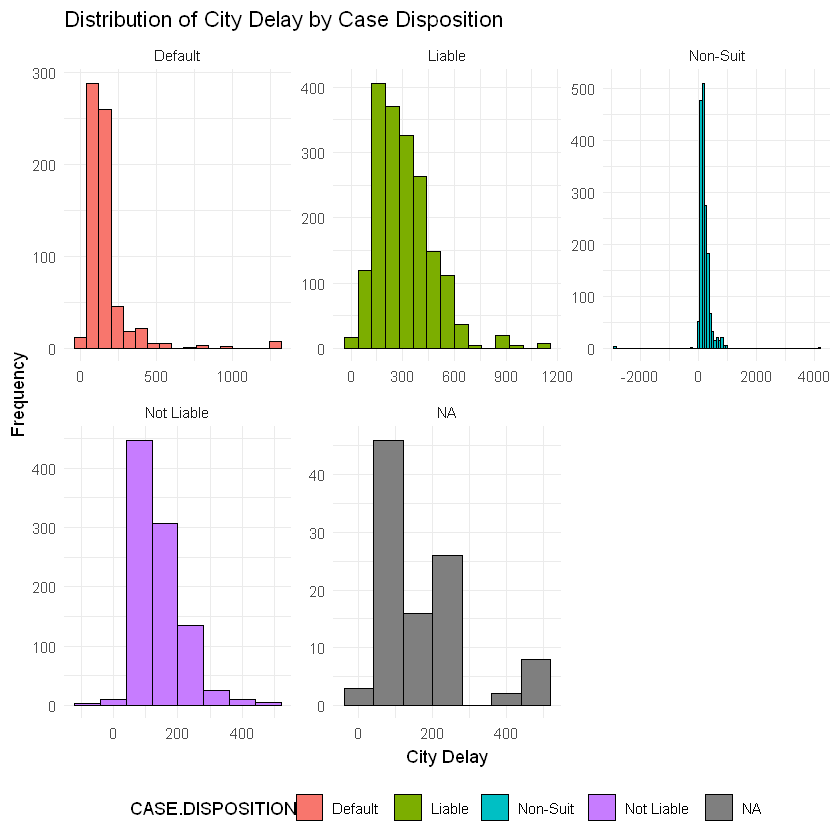

In [59]:
ggplot(data = df5_filtered, aes(x= CityDelay, fill = CASE.DISPOSITION)) +
  geom_histogram(binwidth = 80, color = "black") +
  facet_wrap(~ CASE.DISPOSITION, scales = "free") +
  labs(x = 'City Delay', y = "Frequency", title = "Distribution of City Delay by Case Disposition") +
  theme_minimal() +
  theme(legend.position = "bottom")

> **💡Interpretation of Graphs💡-**
>
> In 'Default' CASE.DISTRIBUTION most city delays fall within the range of approximately 0 to 500. This suggests that for cases with a 'Default' disposition, the time between the violation data and the hearing date tends to be relatively short, with most cases being resolved or addressed within this timeframe. 
>
> 'Liable' CASE.DISTRIBUTION is bell-shaped with the peak occuring around a city delay of approximately 600. This indicates that for cases where the disposition is 'Liable', there is a broader range of city delays, with a signifuicant number of cases having longer delays before the hearing date compared to other dispositions.
>
> 'Non-Suit' CASE.DISTRIBUTION exhibit unusual pattern. Most frequencies are extreme negative values, which could imply an outlier. 
>
> 'Not Liable' CASE.DISTRIBUTION, frequencies are concentrated between 0 and about 400 with a peak around 200. This indicates that for cases with a 'Not Liable' disposition, the city delays are generally shorter compared to 'Liable' cases, with a peak occurring around a delay of 200. This suggests that these cases tend to be resolved or adderessed relatively quickly.

#### Solution - 12

In [60]:
#Calculate average imposed fine for each type of case disposition
average_imposed_fine <- df5_filtered %>%
  group_by(CASE.DISPOSITION) %>%
  summarise(average_imposed_fine = mean(IMPOSED.FINE, na.rm = TRUE)) %>%
  arrange(average_imposed_fine)

Warning message:
"Factor `CASE.DISPOSITION` contains implicit NA, consider using `forcats::fct_explicit_na`"

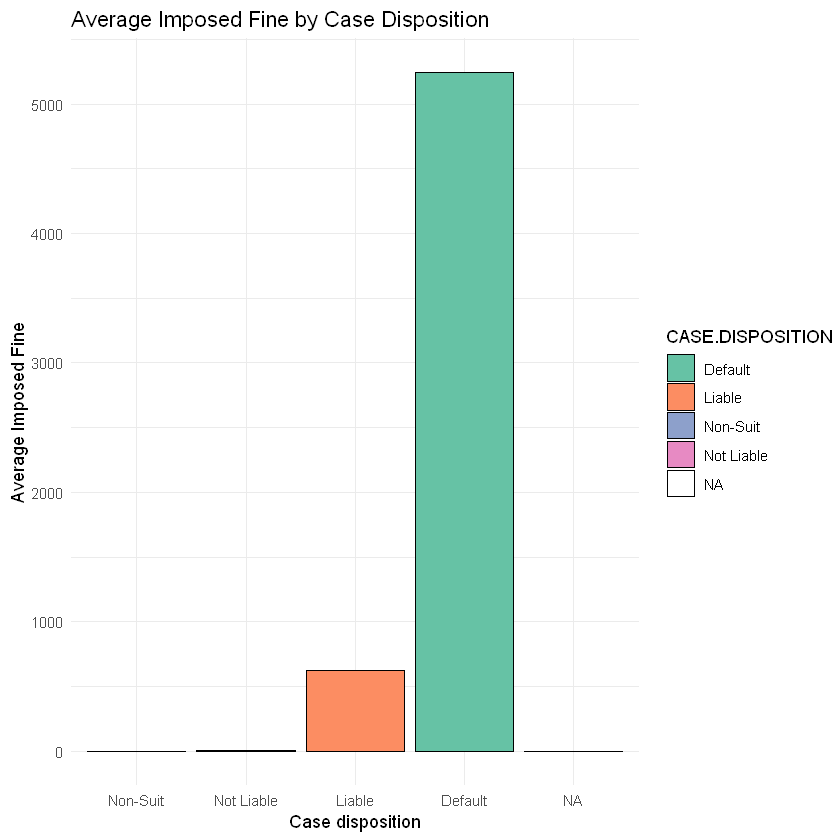

In [61]:
# Barplot
ggplot(average_imposed_fine, aes(x = reorder(CASE.DISPOSITION, average_imposed_fine), y = average_imposed_fine, fill = CASE.DISPOSITION)) +
  geom_bar(stat = 'identity', color = 'black') +
  labs(x = "Case disposition", y = "Average Imposed Fine", title = "Average Imposed Fine by Case Disposition") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set2")

#### Solution - 13

Warning message:
"Removed 2810 rows containing non-finite values (stat_bin)."

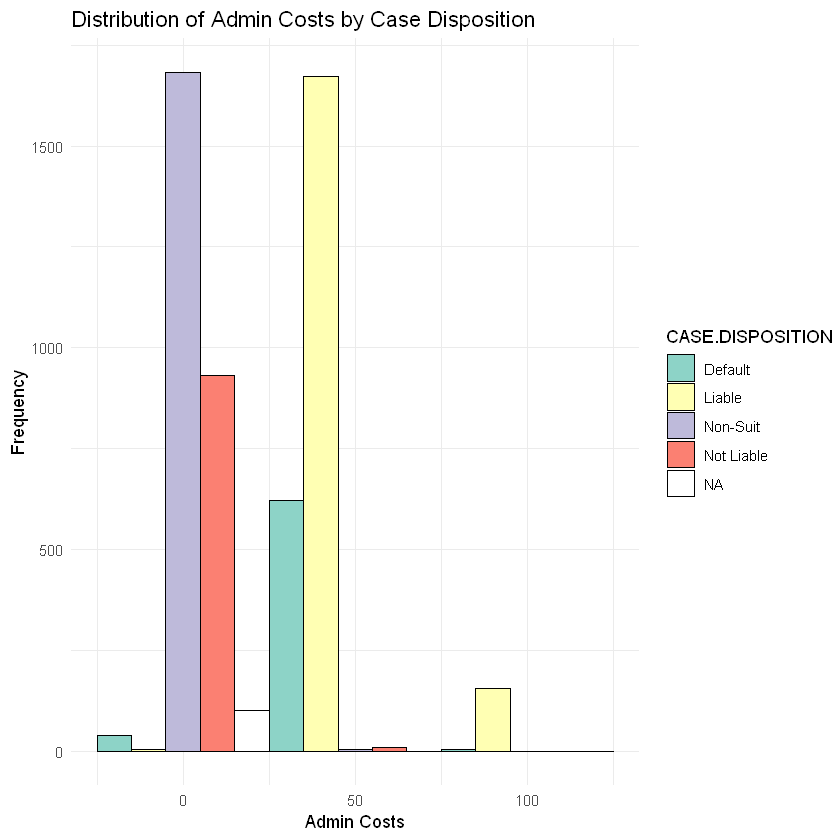

In [62]:
# Histogram
ggplot(df5_filtered, aes(x = ADMIN.COSTS, fill = CASE.DISPOSITION)) +
  geom_histogram(binwidth = 50, color = "black", position = "dodge") +
  labs(x = "Admin Costs", y = "Frequency", title = "Distribution of Admin Costs by Case Disposition") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")

#### Solution - 14

In [96]:
library(dplyr)
library(forcats)

# Count occurrences of each Violation Description and identify the top 5
top_5_violation_desc <- df5_filtered %>%
  count(VIOLATION.DESCRIPTION) %>%
  arrange(desc(n)) %>%
  head(5) %>%
  pull(VIOLATION.DESCRIPTION)

# Filter the dataset to keep only rows with the top 5 Violation Descriptions
df7 <- df5_filtered %>%
  filter(VIOLATION.DESCRIPTION %in% top_5_violation_desc)

# Convert VIOLATION.DESCRIPTION to factor with explicit NA levels
df7$VIOLATION.DESCRIPTION <- fct_explicit_na(df7$VIOLATION.DESCRIPTION)

# Print out the unique values for Violation Description
unique_violation_desc <- unique(df7$VIOLATION.DESCRIPTION)
print(unique_violation_desc)


Warning message:
"Factor `VIOLATION.DESCRIPTION` contains implicit NA, consider using `forcats::fct_explicit_na`"

[1] (Missing)                                                                                                                                                                       
[2] Description of work:                                                                                                                                                            
[3] Submit plans prepared, signed, and sealed by a licensed architect or registered structural engineer for approval and obtain permit. (13-32-010, 13-32-040, 13-40-010, 13-40-020)
[4] Arrange for inspection of premises. (13-12-100)                                                                                                                                 
[5] Obtain permit before performing work. (13-32-010)                                                                                                                               
1191 Levels: - Every building or part thereof which is in an unsanitary condition by reason of 

> **💡Interpretation of Code💡-**
>
> In the enviornment of R programming language, the code aims to filter the dataset `df5_filtered` to retain only rows with the top 5 most common Violation Descriptionss.
>
> We first pull up the library `dplyr` & `forcats`. Then we count the occurance of each Violation Description in the dataset and identify  the top 5 most common description using `count`, `arrange`, `head` and `pull` functions.
>
> Next, we filter the dataset `df5_filtered` to keep only rows with top 5 Violation Descriptions using `filter` functionn from `dplyr`. After filtering, we attempt to convert the `VIOLATION.DESCRIPTION` coloumn into a factor with explicit NA using `forcats::fct_explicit_na`. Howerver, still a warning messege is generated indicating that the it still contains NA values.

#### Solution - 14 a]

In [98]:
library(dplyr)
library(forcats)

# Count occurrences of each Violation Description and identify the top 5
top_5_violation_desc <- df7 %>%
  count(VIOLATION.DESCRIPTION) %>%
  arrange(desc(n)) %>%
  head(5) %>%
  pull(VIOLATION.DESCRIPTION)

# Filter the dataset to keep only rows with the top 5 Violation Descriptions
df7 <- df7 %>%
  filter(VIOLATION.DESCRIPTION %in% top_5_violation_desc)

# Define shortened labels for the top 5 Violation Descriptions
short_labels <- c("Missing", "Work Description", "Inspection Arrangement", "Obtain Permit", "Public Nuisance")

# Create a new column with the shortened descriptions
df7 <- df7 %>%
  mutate(shortened_description = case_when(
    VIOLATION.DESCRIPTION == top_5_violation_desc[1] ~ short_labels[1],
    VIOLATION.DESCRIPTION == top_5_violation_desc[2] ~ short_labels[2],
    VIOLATION.DESCRIPTION == top_5_violation_desc[3] ~ short_labels[3],
    VIOLATION.DESCRIPTION == top_5_violation_desc[4] ~ short_labels[4],
    VIOLATION.DESCRIPTION == top_5_violation_desc[5] ~ short_labels[5]
  ))

# Convert the shortened descriptions into a factor and explicitly define NA levels
df7$shortened_description <- fct_explicit_na(factor(df7$shortened_description))

# Print out the unique values for Violation Description
unique_violation_desc <- unique(df7$shortened_description)
print(unique_violation_desc)


[1] Missing                Obtain Permit          Work Description      
[4] Inspection Arrangement Public Nuisance       
5 Levels: Inspection Arrangement Missing Obtain Permit ... Work Description


> **💡Interpretation of Results💡-**
> 
> The top 5 Most Common Violation Descriptions are-
> Missing, Obtain Permit, Work Description, Inspection Arrangement, Public Nuisance.
>

#### Solution - 15

In [76]:
# Install and load the leaflet package
install.packages("leaflet")
library(leaflet)

# Load necessary libraries
library(dplyr)
library(ggplot2)

also installing the dependencies 'rlang', 'Rcpp', 'htmltools', 'terra', 'htmlwidgets', 'raster'




  There are binary versions available but the source versions are later:
             binary source needs_compilation
rlang        0.4.11  1.1.3              TRUE
Rcpp          1.0.6 1.0.12              TRUE
htmltools   0.5.1.1  0.5.7              TRUE
terra         1.2-5 1.7-71              TRUE
htmlwidgets   1.5.3  1.6.4             FALSE
raster       3.4-10 3.6-26              TRUE
leaflet     2.0.4.1  2.2.1             FALSE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'htmltools' successfully unpacked and MD5 sums checked
package 'terra' successfully unpacked and MD5 sums checked
package 'raster' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\asusw\AppData\Local\Temp\RtmpiWbHnW\downloaded_packages


installing the source packages 'htmlwidgets', 'leaflet'

Warning message in install.packages("leaflet"):
"installation of package 'htmlwidgets' had non-zero exit status"Warning message in install.packages("leaflet"):
"installation of package 'leaflet' had non-zero exit status"

ERROR: Error in library(leaflet): there is no package called 'leaflet'


Warning message:
"Removed 1 rows containing missing values (position_stack)."

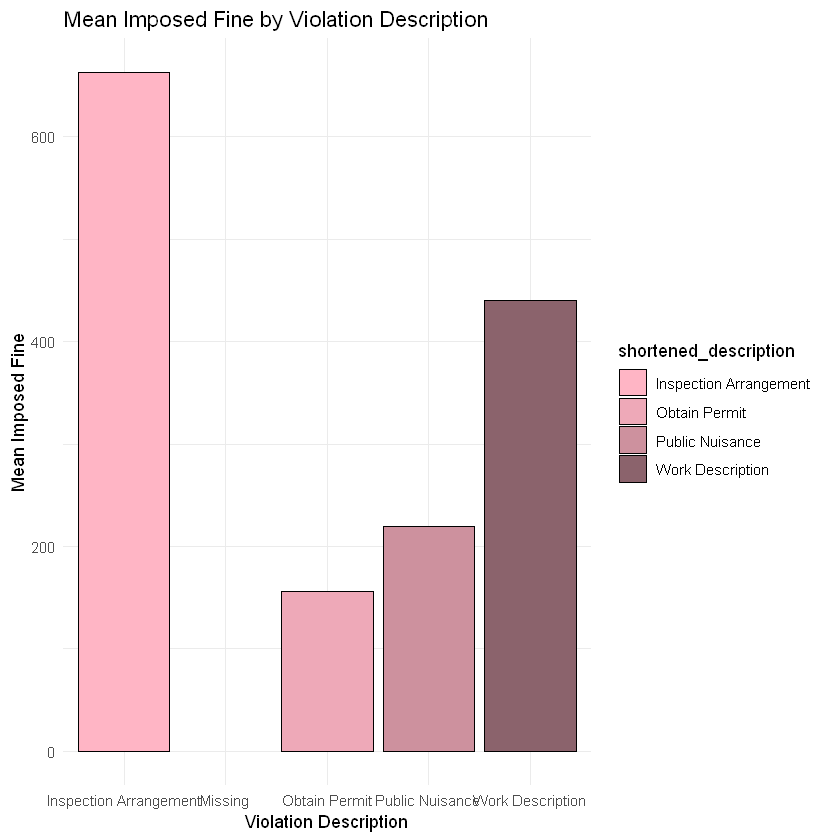

In [99]:
# Create the barplot
mean_imposed_fine <- df7 %>%
  group_by(shortened_description) %>%
  summarise(mean_imposed_fine = mean(IMPOSED.FINE, na.rm = TRUE))

# Arrange bars in decreasing order of mean imposed fine
mean_imposed_fine <- mean_imposed_fine %>%
  arrange(desc(mean_imposed_fine))

# Create the barplot
ggplot(mean_imposed_fine, aes(x = shortened_description, y = mean_imposed_fine, fill = shortened_description)) +
  geom_bar(stat = "identity", color = "black") +
  labs(x = "Violation Description", y = "Mean Imposed Fine", title = "Mean Imposed Fine by Violation Description") +
  scale_fill_manual(values = c("pink1", "pink2", "pink3", "pink4", "red")) + 
  theme_minimal()


> **💡Interpretation of Code & Graph💡-**
>
> Using `leaflet`, `dplyr` and `ggplot2` this graph was generated.
>
> We calculate the mean imposed fine for wach if the top 5 violaiton descriptions (`shortened_description`) from the `df` dataset. Thisis achieved by grouping the data by `shortened_desccription` and summarizing the mean imposed fine for rach group using `summarise()` function.
>
> The resulting barplot visually represents the mean imposed fine for each of the top five violation descriptions. It helps in understanding the variations in fines imposed for different types of violations.
>
> We noticed that in the graph 'Inspection Arrangement' & 'Work Descrition' have higher fines ccompared to others. This could be because of multiple reasons such as:-
>
> 1. They tend to have more severe infractions or violations of regulations compared to other type of violations.
>
> 2. They occur more frequently or are more commonly reported, leading to increased scrutiny and enforcement by regulatory athorities.
>
> NOTE - The warning message "Removed 1 rows containing missing values (position_stack)" indicates that during the creation of the barplot, one row was removed due to missing values. This typically occurs when there are NA (missing) values present in the dataset used for plotting. As a result the ggplot2 removed this row from the plot to avoid errors or inconsistencies in the visualization.

#### Solution - 16